The data used is 100 images from VOC_2012 in the 'demo_data' folder of current directory.  
75 images in train-data  
25 images in test-data  

In [1]:
# Package imports
from PIL import Image
import _pickle as pkl
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
sess = tf.InteractiveSession()
import glob
import os
%matplotlib inline  
print ("Packs loaded...")

Packs loaded...


In [2]:
# Location of the files
data_path = 'demo_data/'
# Training data
path1 = os.getcwd() + '/' + data_path + 'train_images/'
path2 = os.getcwd() + '/' + data_path + 'train_segmented/'
trainimglist = glob.glob(path1 + '/*.jpg')
trainannotlist = glob.glob(path2 + '/*.png')
print ("%d train images" % (len(trainimglist)))
print ("%d train annotations" % (len(trainannotlist)))

# Test data
path1 = os.getcwd() + '/' + data_path + 'test_images/'
path2 = os.getcwd() + '/' + data_path + 'test_segmented/'
testimglist = glob.glob(path1 + '/*.jpg')
testannotlist = glob.glob(path2 + '/*.png')
print ("%d test images" % (len(testimglist)))
print ("%d test annotations" % (len(testannotlist)))

100 train images
100 train annotations
33 test images
33 test annotations


In [3]:
# Parameters
height = 224
width = 224
nrclass = 2  # of classes

trainData = None
trainLabel = None
trainLabelOneHot = None
trainlen = len(trainimglist) #of train images

testData = None
testLabel = None
testLabelOneHot = None
testlen = len(testimglist) #of test images

""" Train data process """ 
for (f1, f2, i) in zip(trainimglist, trainannotlist, range(trainlen)):
    # print ("[%02d/%02d]f1: %sf2: %s" % (i, trainlen, f1, f2))
    # Train image
    img1 = Image.open(f1)
    img1 = img1.resize((height, width))
    rgb  = np.array(img1).reshape(1, height, width, 3)
    # Train label
    img2 = Image.open(f2)
    img2 = img2.resize((height, width), Image.LINEAR)
    label = np.array(img2).reshape(1, height, width, 1)
    # Stack images and labels
    if i == 0: 
        trainData = rgb
        trainLabel = label
    else:
        trainData = np.concatenate((trainData, rgb), axis=0)
        trainLabel = np.concatenate((trainLabel, label), axis=0)

# Label for 'border' changed from '255' to '21' (new label) or to '0' (background)
trainLabel[trainLabel == 255] = 0

print ("Train images read")

# Onehot-coded label
# Onehot-coded label
class_labels_tensor = tf.not_equal(trainLabel, 0)
background_labels_tensor = tf.equal(trainLabel, 0)

# Convert the boolean values into floats -- so that
# computations in cross-entropy loss is correct
bit_mask_class = tf.to_float(class_labels_tensor)
bit_mask_background = tf.to_float(background_labels_tensor)

trainLabelOneHot = (tf.concat(axis=3, values=[bit_mask_class,
                                                bit_mask_background])).eval()
print ("Train OneHot Encoding process done.")  
ntrain = len(trainData)


""" Test data process """ 
for (f1, f2, i) in zip(testimglist, testannotlist, range(testlen)):
    # print ("[%02d/%02d]f1: %sf2: %s" % (i, testlen, f1, f2))
    # Train image
    img1 = Image.open(f1)
    img1 = img1.resize((height, width))
    rgb  = np.array(img1).reshape(1, height, width, 3)
    # Train label
    img2 = Image.open(f2)
    img2 = img2.resize((height, width), Image.LINEAR)
    label = np.array(img2).reshape(1, height, width, 1)
    # Stack images and labels
    if i == 0: 
        testData = rgb
        testLabel = label
    else:
        testData = np.concatenate((testData, rgb), axis=0)
        testLabel = np.concatenate((testLabel, label), axis=0)
        
# Label for 'border' changed from '255' to '21' (new label) or to '0' (background)
testLabel[testLabel == 255] = 0

print ("\nTest images read")

# Onehot-coded label
# Onehot-coded label
class_labels_tensor1 = tf.not_equal(testLabel, 0)
background_labels_tensor1 = tf.equal(testLabel, 0)

# Convert the boolean values into floats -- so that
# computations in cross-entropy loss is correct
bit_mask_class1 = tf.to_float(class_labels_tensor1)
bit_mask_background1 = tf.to_float(background_labels_tensor1)

testLabelOneHot = (tf.concat(axis=3, values=[bit_mask_class1,
                                                bit_mask_background1])).eval()

print ("Test OneHot Encoding data process done.")
ntest = len(testData)

print ("\n* * * DATA PROCESSING COMPLETED * * *")

Train images read
Train OneHot Encoding process done.

Test images read
Test OneHot Encoding data process done.

* * * DATA PROCESSING COMPLETED * * *


In [4]:
# Batch-dimensions
print ("                               N * H *  W * C")
print ("Training images:            ", trainData.shape)
print ("Training annotation images: ", trainLabel.shape)
print ("Test images:                ", testData.shape)
print ("Test annotations images:    ", testLabel.shape)

print ()
print ("Shape of 'trainLabelOneHot': %s" % (trainLabelOneHot.shape,))
print ("Shape of 'testLabelOneHot' : %s" % (testLabelOneHot.shape,))

                               N * H *  W * C
Training images:             (100, 224, 224, 3)
Training annotation images:  (100, 224, 224, 1)
Test images:                 (33, 224, 224, 3)
Test annotations images:     (33, 224, 224, 1)

Shape of 'trainLabelOneHot': (100, 224, 224, 2)
Shape of 'testLabelOneHot' : (33, 224, 224, 2)


In [5]:
# Memory consumption (by default np.array is FLOAT32 i.e. 32 bits)
print ("Train Image data     : %.2f" % (trainData.nbytes / (1024*1024)), " MB")
print ("Train Annotation data: %.2f" % (trainLabel.nbytes / (1024*1024)), " MB")
print ("Test Image data      : %.2f" % (testData.nbytes / (1024*1024)), " MB")
print ("Test Annotation data : %.2f" % (testLabel.nbytes / (1024*1024)), " MB")

print ("Train One-Hot Annotation data: %.2f" % (trainLabelOneHot.nbytes / (1024*1024)), " MB")
print ("Test One-Hot Annotation data : %.2f" % (testLabelOneHot.nbytes / (1024*1024)), " MB")

Train Image data     : 14.36  MB
Train Annotation data: 4.79  MB
Test Image data      : 4.74  MB
Test Annotation data : 1.58  MB
Train One-Hot Annotation data: 38.28  MB
Test One-Hot Annotation data : 12.63  MB


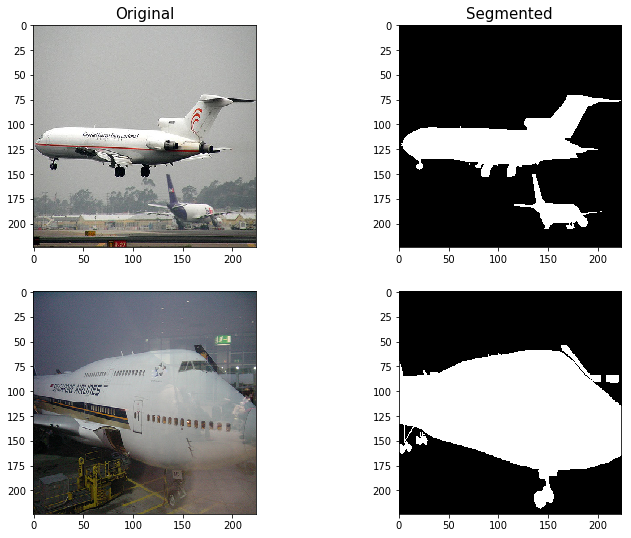

In [6]:
# Samples from data set
fig = plt.figure(figsize=(12,9))
gs = gridspec.GridSpec(2, 2)

idx = 9
# Sample_1
ax11 = fig.add_subplot(gs[0, 0])
ax11.imshow(trainData[idx])
ax11.set_title('Original', fontsize=15)

ax12 = fig.add_subplot(gs[0, 1])
ax12.imshow(trainLabel[idx,:,:,0], cmap='gray')
ax12.set_title('Segmented', fontsize=15)

# Sample_2
ax21 = fig.add_subplot(gs[1, 0])
ax21.imshow(testData[idx])

ax22 = fig.add_subplot(gs[1, 1])
ax22.imshow(testLabel[idx,:,:,0], cmap='gray')

In [7]:
# Define functions
x = tf.placeholder(tf.float32, [None, height, width, 3])
tf.summary.image('input_images', x, 3)
y = tf.placeholder(tf.float32, [None, height, width, nrclass])
keepprob = tf.placeholder(tf.float32)

# Kernels
ksize = 3

input_channels = 3

def weight_variable(shape, name):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial,name=name, dtype=tf.float32)
    
def bias_variable(shape, name):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name=name, dtype=tf.float32)

wc1 = weight_variable([3, 3, 3, 16], "Weight_conv_1")
bc1 = bias_variable([16], "Bias_conv_1")

wc2 = weight_variable([3, 3, 16, 16], "Weight_conv_2")
bc2 = bias_variable([16], "Bias_conv_2")

wc3 = weight_variable([3, 3, 16, 32], "Weight_conv_3")
bc3 = bias_variable([32], "Bias_conv_3")

wc4 = weight_variable([3, 3, 32, 32], "Weight_conv_4")
bc4 = bias_variable([32], "Bias_conv_4")

wc5 = weight_variable([3, 3, 32, 64], "Weight_conv_5")
bc5 = bias_variable([64], "Bias_conv_5")

wc6 = weight_variable([3, 3, 64, 64], "Weight_conv_6")
bc6 = bias_variable([64], "Bias_conv_6")

wc7 = weight_variable([3, 3, 64, 64], "Weight_conv_7")
bc7 = bias_variable([64], "Bias_conv_7")

wc8 = weight_variable([3, 3, 64, 128], "Weight_conv_8")
bc8 = bias_variable([128], "Bias_conv_8")

wc9 = weight_variable([3, 3, 128, 128], "Weight_conv_9")
bc9 = bias_variable([128], "Bias_conv_9")

wc10 = weight_variable([3, 3, 128, 128], "Weight_conv_10")
bc10 = bias_variable([128], "Bias_conv_10")

wc11 = weight_variable([3, 3, 128, 128], "Weight_conv_11")
bc11 = bias_variable([128], "Bias_conv_11")

wc12 = weight_variable([3, 3, 128, 128], "Weight_conv_12")
bc12 = bias_variable([128], "Bias_conv_12")

wc13 = weight_variable([3, 3, 128, 128], "Weight_conv_13")
bc13 = bias_variable([128], "Bias_conv_13")

wc14 = weight_variable([7, 7, 128, 512], "Weight_conv_14")
bc14 = bias_variable([512], "Bias_conv_2")

wc15 = weight_variable([1, 1, 512, 512], "Weight_conv_15")
bc15 = bias_variable([512], "Bias_conv_3")

wc16 = weight_variable([7, 7, 128, 512], "Weight_conv_16")
bc16 = bias_variable([128], "Bias_conv_16")

wc17 = weight_variable([3, 3, 128, 128], "Weight_conv_17")
bc17 = bias_variable([128], "Bias_conv_17")

wc18 = weight_variable([3, 3, 128, 128], "Weight_conv_18")
bc18 = bias_variable([128], "Bias_conv_18")

wc19 = weight_variable([3, 3, 128, 128], "Weight_conv_19")
bc19 = bias_variable([128], "Bias_conv_19")

wc20 = weight_variable([3, 3, 128, 128], "Weight_conv_20")
bc20 = bias_variable([128], "Bias_conv_20")

wc21 = weight_variable([3, 3, 128, 128], "Weight_conv_21")
bc21 = bias_variable([128], "Bias_conv_21")

wc22 = weight_variable([3, 3, 64, 128], "Weight_conv_22")
bc22 = bias_variable([64], "Bias_conv_22")

wc23 = weight_variable([3, 3, 64, 64], "Weight_conv_23")
bc23 = bias_variable([64], "Bias_conv_23")

wc24 = weight_variable([3, 3, 64, 64], "Weight_conv_24")
bc24 = bias_variable([64], "Bias_conv_24")

wc25 = weight_variable([3, 3, 32, 64], "Weight_conv_25")
bc25 = bias_variable([32], "Bias_conv_25")

wc26 = weight_variable([3, 3, 32, 32], "Weight_conv_26")
bc26 = bias_variable([32], "Bias_conv_26")

wc27 = weight_variable([3, 3, 16, 32], "Weight_conv_27")
bc27 = bias_variable([16], "Bias_conv_27")

wc28 = weight_variable([3, 3, 16, 16], "Weight_conv_28")
bc28 = bias_variable([16], "Bias_conv_28")

wc29 = weight_variable([3, 3, 8, 16], "Weight_conv_29")
bc29 = bias_variable([8], "Bias_conv_29")

wc30 = weight_variable([1, 1, 2, 8], "Weight_conv_30")
bc30 = bias_variable([2], "Bias_conv_30")


In [8]:
def conv_layer(x_input, w, b, strides=[1, 1, 1, 1], padding='SAME'):
    conv = tf.nn.conv2d(x_input, w, strides=strides, padding=padding)
    conv = tf.nn.relu(conv + b)
    tf.summary.histogram("conv_weights", w)
    tf.summary.histogram("conv_biases", b)
    tf.summary.histogram("convolutions", conv)
    return conv

def deconv_layer(x_input, w, b, strides=[1, 1, 1, 1], padding='SAME'):
    shape = tf.shape(x_input)
    out_shape = [shape[0], shape[1], shape[2], w.get_shape().as_list()[2]]
    deconv = tf.nn.conv2d_transpose(x_input, filter=w, output_shape=out_shape, strides=strides, padding=padding)    
    deconv = tf.nn.relu(deconv + b)
    tf.summary.histogram("deconv_weights", w)
    tf.summary.histogram("deconv_biases", b)
    tf.summary.histogram("deconvolutions", deconv)
    return deconv

def pool_layer(x_input):
    pool_maps, pool_argmax = tf.nn.max_pool_with_argmax(x_input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    tf.summary.histogram("pooled_maps", pool_maps)
    return pool_maps, pool_argmax

def unravel_argmax(argmax, shape):
    #print ("argmax: ", argmax.shape)
    output_list = [argmax // (shape[2]*shape[3]), argmax % (shape[2]*shape[3]) // shape[3]]
    return tf.stack(output_list)

def unpool_layer2x2_batch(bottom, argmax):
    bottom_shape = tf.shape(bottom)
    top_shape = [bottom_shape[0], bottom_shape[1]*2, bottom_shape[2]*2, bottom_shape[3]]

    batch_size = top_shape[0]
    height = top_shape[1]
    width = top_shape[2]
    channels = top_shape[3]

    argmax_shape = tf.to_int64([batch_size, height, width, channels])
    argmax = unravel_argmax(argmax, argmax_shape)

    t1 = tf.to_int64(tf.range(channels))
    t1 = tf.tile(t1, [batch_size*(width//2)*(height//2)])
    t1 = tf.reshape(t1, [-1, channels])
    t1 = tf.transpose(t1, perm=[1, 0])
    t1 = tf.reshape(t1, [channels, batch_size, height//2, width//2, 1])
    t1 = tf.transpose(t1, perm=[1, 0, 2, 3, 4])

    t2 = tf.to_int64(tf.range(batch_size))
    t2 = tf.tile(t2, [channels*(width//2)*(height//2)])
    t2 = tf.reshape(t2, [-1, batch_size])
    t2 = tf.transpose(t2, perm=[1, 0])
    t2 = tf.reshape(t2, [batch_size, channels, height//2, width//2, 1])

    t3 = tf.transpose(argmax, perm=[1, 4, 2, 3, 0])

    t = tf.concat([t2, t3, t1], 4)
    indices = tf.reshape(t, [(height//2)*(width//2)*channels*batch_size, 4])

    x1 = tf.transpose(bottom, perm=[0, 3, 1, 2])
    values = tf.reshape(x1, [-1])

    delta = tf.SparseTensor(indices, values, tf.to_int64(top_shape))
    unpool_maps = tf.sparse_tensor_to_dense(tf.sparse_reorder(delta))
    tf.summary.histogram("unpooled_maps", unpool_maps)
    return unpool_maps

In [9]:
#------------Architecture---------------------------------------------------------------------------------------------------
print(x.shape)

conv_1_1 = conv_layer(x, wc1, bc1)
print(conv_1_1.shape)
conv_1_2 = conv_layer(conv_1_1, wc2, bc2)
print(conv_1_2.shape)

pool_1, pool_1_argmax = pool_layer(conv_1_2)
print(pool_1.shape)

conv_2_1 = conv_layer(pool_1, wc3, bc3)
print(conv_2_1.shape)
conv_2_2 = conv_layer(conv_2_1, wc4, bc4)
print(conv_2_2.shape)

pool_2, pool_2_argmax = pool_layer(conv_2_2)
print(pool_2.shape)

conv_3_1 = conv_layer(pool_2, wc5, bc5)
print(conv_3_1.shape)
conv_3_2 = conv_layer(conv_3_1, wc6, bc6)
print(conv_3_2.shape)
conv_3_3 = conv_layer(conv_3_2, wc7, bc7)
print(conv_3_3.shape)

pool_3, pool_3_argmax = pool_layer(conv_3_3)
print(pool_3.shape)

conv_4_1 = conv_layer(pool_3, wc8, bc8)
print(conv_4_1.shape)
conv_4_2 = conv_layer(conv_4_1, wc9, bc9)
print(conv_4_2.shape)
conv_4_3 = conv_layer(conv_4_2, wc10, bc10)
print(conv_4_3.shape)

pool_4, pool_4_argmax = pool_layer(conv_4_3)
print(pool_3.shape)

conv_5_1 = conv_layer(pool_4, wc11, bc11)
print(conv_5_1.shape)
conv_5_2 = conv_layer(conv_5_1, wc12, bc12)
print(conv_5_2.shape)
conv_5_3 = conv_layer(conv_5_2, wc13, bc13)
print(conv_5_3.shape)


pool_5, pool_5_argmax = pool_layer(conv_5_3)
print(pool_3.shape)

fc_6 = conv_layer(pool_5, wc14, bc14)
print(fc_6.shape)
fc_7 = conv_layer(fc_6, wc15, bc15)
print(fc_7.shape)

deconv_fc_6 = deconv_layer(fc_7, wc16, bc16)
print(deconv_fc_6.shape)

unpool_5 = unpool_layer2x2_batch(deconv_fc_6, pool_5_argmax)
print(unpool_5.shape)

deconv_5_3 = deconv_layer(unpool_5, wc17, bc17)
print(deconv_5_3.shape)
deconv_5_2 = deconv_layer(deconv_5_3, wc18, bc18)
print(deconv_5_2.shape)
deconv_5_1 = deconv_layer(deconv_5_2, wc19, bc19)
print(deconv_5_1.shape)

unpool_4 = unpool_layer2x2_batch(deconv_5_1, pool_4_argmax)
print(unpool_4.shape)

deconv_4_3 = deconv_layer(unpool_4, wc20, bc20)
print(deconv_4_3.shape)
deconv_4_2 = deconv_layer(deconv_4_3, wc21, bc21)
print(deconv_4_2.shape)
deconv_4_1 = deconv_layer(deconv_4_2, wc22, bc22)
print(deconv_4_1.shape)

unpool_3 = unpool_layer2x2_batch(deconv_4_1, pool_3_argmax)
print(unpool_3.shape)

deconv_3_3 = deconv_layer(unpool_3, wc23, bc23)
print(deconv_3_3.shape)
deconv_3_2 = deconv_layer(deconv_3_3, wc24, bc24)
print(deconv_3_2.shape)
deconv_3_1 = deconv_layer(deconv_3_2, wc25, bc25)
print(deconv_3_1.shape)


unpool_2 = unpool_layer2x2_batch(deconv_3_1, pool_2_argmax)
print(unpool_2.shape)

deconv_2_2 = deconv_layer(unpool_2, wc26, bc26)
print(deconv_2_2.shape)
deconv_2_1 = deconv_layer(deconv_2_2, wc27, bc27)
print(deconv_2_1.shape)

unpool_1 = unpool_layer2x2_batch(deconv_2_1, pool_1_argmax)
print(unpool_1.shape)

deconv_1_2 = deconv_layer(unpool_1, wc28, bc28)
print(deconv_1_2.shape)
deconv_1_1 = deconv_layer(deconv_1_2, wc29, bc29)
print(deconv_1_1.shape)

pred = deconv_layer(deconv_1_1, wc30, bc30)
print(pred.shape)

# 'predmax' is output image with 1 channel of labels
predmax = tf.argmax(pred, 3)
#tf.summary.image("predicted_image", predmax, 3)
# 'ymax' is ground truth image with 1 channel of labels (equal to original annotations)
ymax = tf.argmax(y, 3)
#tf.summary.image("ground_truth", ymax, 3)

lin_pred = tf.reshape(pred, shape=[-1, nrclass])
lin_y = tf.reshape(y, shape=[-1, nrclass])

# Accuracy & Loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=lin_pred, labels=lin_y))
tf.summary.scalar("cost", cost)
correct = tf.equal(ymax, predmax) 
accuracy = tf.reduce_mean(tf.cast(correct, "float"))
tf.summary.scalar("accuracy", accuracy)

# Optimizer
optm = tf.train.AdamOptimizer(0.0001).minimize(cost)







#conv1 = conv_layer(x, wc1, bc1)
#pool_1, pool_1_argmax = pool_layer(conv1)

#conv2 = conv_layer(pool_1, wc2, bc2)
#pool_2, pool_2_argmax = pool_layer(conv2)

#conv3 = conv_layer(pool_2, wc3, bc3)
#pool_3, pool_3_argmax = pool_layer(conv3)

#fc_1 = conv_layer(pool_3, wfc1, bfc1)
#fc_2 = conv_layer(fc_1, wfc2, bfc2)

#deconv3 = deconv_layer(fc_2, wd3, bd3)
#unpool_3 = unpool_layer2x2_batch(deconv3, pool_3_argmax)#, tf.shape(conv3))

#deconv2 = deconv_layer(deconv3, wd2, bd2)
#unpool_2 = unpool_layer2x2_batch(deconv2, pool_2_argmax)#, tf.shape(conv2))

#deconv1 = deconv_layer(deconv2, wd1, bd1)
#unpool_1 = unpool_layer2x2_batch(deconv1, pool_1_argmax)#, tf.shape(conv1))

#print ("*******************************************************************")
#print ("X: ", x.shape)
#print ("wc1: ", wc1.shape)
#print ("bc1: ", bc1.shape)
#print ("After Conv_1: ", conv_1_1.shape)
#print ("*******************************************************************")
#print ("wc2: ", wc2.shape)
#print ("bc2: ", bc2.shape)
#print ("After Conv_2: ", conv_1_2.shape)
#print ("After Pool_2: ", pool_1.shape)
#print ("Pool_2_argmax: ", pool_1_argmax.shape)
#print ("*******************************************************************")
#print ("wc1: ", wc3.shape)
#print ("bc1: ", bc3.shape)
#print ("After Conv_1: ", conv_2_1.shape)
#print ("*******************************************************************")
#print ("Pool1: ", pool_2.shape)
#print ("wc2: ", wc4.shape)
#print ("bc2: ", bc4.shape)
#print ("After Conv_2: ", conv_2_2.shape)
#print ("After Pool_2: ", pool_2.shape)
#print ("Pool_2_argmax: ", pool_2_argmax.shape)
#print ("*******************************************************************")
#print ("Pool2: ", pool_2.shape)
#print ("wc3: ", wc3.shape)
#print ("bc3: ", bc3.shape)
#print ("After Conv_3: ", conv3.shape)
#print ("After Pool_3: ", pool_3.shape)
#print ("Pool_3_argmax: ", pool_3_argmax.shape)
#print ("*******************************************************************")
#print ("Pool3: ", pool_3.shape)
#print ("wfc1: ", wfc1.shape)
#print ("bfc1: ", bfc1.shape)
#print ("After FCN fc_1 : ", fc_1.shape)
#print ("*******************************************************************")
#print ("fc_1: ", fc_1.shape)
#print ("wfc2: ", wfc2.shape)
#print ("bfc2: ", bfc2.shape)
#print ("After FCN fc_2 : ", fc_2.shape)
#print ("*******************************************************************")
#print ("fc_2: ", fc_2.shape)
#print ("wd3: ", wd3.shape)
#print ("bd3: ", bd3.shape)
#print ("After DE_Conv_3: ", deconv3.shape)
#print ("After UN_Pool_3: ", unpool_3.shape)
#print ("*******************************************************************")
#print ("deconv3: ", deconv3.shape)
#print ("wd2: ", wd2.shape)
#print ("bd2: ", bd2.shape)
#print ("After DE_Conv_2: ", deconv2.shape)
#print ("After UN_Pool_2: ", unpool_2.shape)
#print ("*******************************************************************")
#print ("deconv2: ", deconv2.shape)
#print ("wd1: ", wd1.shape)
#print ("bd1: ", bd1.shape)
#print ("After DE_Conv_1: ", deconv1.shape)
#print ("After UN_Pool_1: ", unpool_1.shape)
#print ("*******************************************************************")


(?, 224, 224, 3)
(?, 224, 224, 16)
(?, 224, 224, 16)
(?, 112, 112, 16)
(?, 112, 112, 32)
(?, 112, 112, 32)
(?, 56, 56, 32)
(?, 56, 56, 64)
(?, 56, 56, 64)
(?, 56, 56, 64)
(?, 28, 28, 64)
(?, 28, 28, 128)
(?, 28, 28, 128)
(?, 28, 28, 128)
(?, 28, 28, 64)
(?, 14, 14, 128)
(?, 14, 14, 128)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 7, 7, 512)
(?, 7, 7, 512)
(?, ?, ?, 128)
(?, ?, ?, ?)
(?, ?, ?, 128)
(?, ?, ?, 128)
(?, ?, ?, 128)
(?, ?, ?, ?)
(?, ?, ?, 128)
(?, ?, ?, 128)
(?, ?, ?, 64)
(?, ?, ?, ?)
(?, ?, ?, 64)
(?, ?, ?, 64)
(?, ?, ?, 32)
(?, ?, ?, ?)
(?, ?, ?, 32)
(?, ?, ?, 16)
(?, ?, ?, ?)
(?, ?, ?, 16)
(?, ?, ?, 8)
(?, ?, ?, 2)


In [10]:
LOGDIR = '/tmp/smmry/'
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(LOGDIR[1:])

batch_size = 1
n_epochs = 1

init = tf.global_variables_initializer()
resumeTraining = True
#sess = tf.Session()
# you need to initialize all variables
sess.run(init)
saver = tf.train.Saver()
writer.add_graph(sess.graph)
checkpoint = tf.train.latest_checkpoint("demo_checkpoint/")
print ("checkpoint: %s" % (checkpoint))
if resumeTraining == False:
    print ("Start from scratch")
elif  checkpoint:
    print ("Restoring from checkpoint", checkpoint)
    saver.restore(sess, checkpoint)
else:
    print ("Couldn't find checkpoint to restore from. Starting over.")

for epoch_i in range(n_epochs):
    trainLoss = []; trainAcc = []
    num_batch = int(ntrain/batch_size)+1

    for _ in range(num_batch):
        randidx = np.random.randint(ntrain, size=batch_size)
        batchData = trainData[randidx]
        batchLabel = trainLabelOneHot[randidx]
        sess.run(optm, feed_dict={x: batchData, y: batchLabel, keepprob: 0.7}) # <== Optm is done here!
        [train_cost, train_accuracy, s] = (sess.run([cost, accuracy, merged], feed_dict={x: batchData, y: batchLabel, keepprob: 1.}))
        trainLoss.append(train_cost)
        trainAcc.append(train_accuracy)
        writer.add_summary(s, _)
        if _ % 1 == 0:
            print (_," Mini batch")

    # Average loss and accuracy
    trainLoss = np.mean(trainLoss)
    trainAcc = np.mean(trainAcc)
    # Run test
    valLoss = sess.run(cost, feed_dict={x: testData[:20,:,:,:], y: testLabelOneHot[:20,:,:,:], keepprob: 1.})
    valAcc = sess.run(accuracy, feed_dict={x: testData[:20,:,:,:], y: testLabelOneHot[:20,:,:,:], keepprob: 1.})
    print ("**** Iteration: ", epoch_i)
    print ("**** TrainlOSS : ",trainLoss, "  TrainAcc : ",trainAcc)
    print ("**** Testloss  : ",valLoss, "TestAcc : ",valAcc)
'''
    # Save snapshot
    if resumeTraining and epoch_i % 1 == 0:
        # Save
        saver.save(sess, 'demo_saver/', global_step = epoch_i)
        # Train data
        index = np.random.randint(trainData.shape[0])
        refimg = trainData[index, :, :, :].reshape(height, width, 3)
        batchData = trainData[index:index+1]
        batchLabel = trainLabelOneHot[index:index+1]
        predMaxOut = sess.run(predmax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        yMaxOut = sess.run(ymax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        gtimg = yMaxOut[0, :, :].reshape(height, width)
        predimg = predMaxOut[0, :, :].reshape(height, width)
        errimg = gtimg - predimg
        # Plot
        xs = np.linspace(0, 140, 128); ys = np.linspace(140, 0, 128)
        plt.figure(figsize=(10, 10)) 
        plt.subplot(2, 2, 1); plt.imshow(refimg); plt.title('Input')
        plt.subplot(2, 2, 2); plt.imshow(gtimg, cmap='gray'); plt.title('Ground truth')
        plt.subplot(2, 2, 3); plt.imshow(predimg, cmap='gray'); plt.title('[Train] Prediction')
        plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        #plt.subplot(2, 2, 2); plt.pcolor(xs, ys, gtimg, vmin=0, vmax=nrclass); plt.title('Ground truth')
        #plt.subplot(2, 2, 3); plt.pcolor(xs, ys, predimg, vmin=0, vmax=nrclass); plt.title('[Train] Prediction')
        #plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        plt.show() 
        # Test data
        index = np.random.randint(testData.shape[0])
        batchData = testData[index:index+1]
        batchLabel = testLabelOneHot[index:index+1]
        predMaxOut = sess.run(predmax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        yMaxOut = sess.run(ymax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        refimg = testData[index, :, :, :].reshape(height, width, 3)
        gtimg = yMaxOut[0, :, :].reshape(height, width)
        predimg = predMaxOut[0, :, :].reshape(height, width)
        errimg = gtimg - predimg
        # Plot
        plt.figure(figsize=(10, 10)) 
        plt.subplot(2, 2, 1); plt.imshow(refimg); plt.title('Input')
        plt.subplot(2, 2, 2); plt.imshow(gtimg, cmap='gray');  plt.title('Ground truth')
        plt.subplot(2, 2, 3); plt.imshow(predimg, cmap='gray'); plt.title('[Test] Prediction')
        plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        #plt.subplot(2, 2, 2); plt.pcolor(xs, ys, gtimg, vmin=0, vmax=nrclass);  plt.title('Ground truth')
        #plt.subplot(2, 2, 3); plt.pcolor(xs, ys, predimg, vmin=0, vmax=nrclass); plt.title('[Test] Prediction')
        #plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        plt.show()
'''
print ("Done")

checkpoint: None
Couldn't find checkpoint to restore from. Starting over.
0  Mini batch
1  Mini batch
2  Mini batch
3  Mini batch
4  Mini batch
5  Mini batch
6  Mini batch
7  Mini batch
8  Mini batch
9  Mini batch
10  Mini batch
11  Mini batch
12  Mini batch
13  Mini batch
14  Mini batch
15  Mini batch
16  Mini batch
17  Mini batch
18  Mini batch
19  Mini batch
20  Mini batch
21  Mini batch
22  Mini batch
23  Mini batch
24  Mini batch
25  Mini batch
26  Mini batch
27  Mini batch
28  Mini batch
29  Mini batch
30  Mini batch
31  Mini batch
32  Mini batch
33  Mini batch
34  Mini batch
35  Mini batch
36  Mini batch
37  Mini batch
38  Mini batch
39  Mini batch
40  Mini batch
41  Mini batch
42  Mini batch
43  Mini batch
44  Mini batch
45  Mini batch
46  Mini batch
47  Mini batch
48  Mini batch
49  Mini batch
50  Mini batch
51  Mini batch
52  Mini batch
53  Mini batch
54  Mini batch
55  Mini batch
56  Mini batch
57  Mini batch
58  Mini batch
59  Mini batch
60  Mini batch
61  Mini batch
62  Mi

In [ ]:
# input : [m, h, w, c]
def Unpooling(inputOrg, size, mask=None):
    # m, c, h, w order
    m = size[0]
    h = np.int32(size[1])
    w = np.int32(size[2])
    c = np.int32(size[3])
    input = tf.transpose(inputOrg, [0, 3, 1, 2])
    x = tf.reshape(input, [-1, 1])
    k = np.float32(np.array([1.0, 1.0]).reshape([1,-1]))
    output = tf.matmul(x, k)
    output = tf.reshape(output,[-1, c, h, w * 2])
    # m, c, w, h
    xx = tf.transpose(output, [0, 1, 3, 2])
    xx = tf.reshape(xx,[-1, 1])
    output = tf.matmul(xx, k)
    # m, c, w, h
    output = tf.reshape(output, [-1, c, w * 2, h * 2])
    output = tf.transpose(output, [0, 3, 2, 1])
    outshape = tf.stack([m, h * 2, w * 2, c])
    if mask != None:
        dense_mask = tf.sparse_to_dense(mask, outshape, output, 0)
        return output, dense_mask
    else:
        return output

# DeconvNet Model
def Model(_X, _W, _b, _keepprob):
    use_bias = 0
    # Encoder 128x128
    encoder1 = tf.nn.conv2d(_X, _W['ce1'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        encoder1 = tf.nn.bias_add(encoder1, _b['be1'])
    encoder1 = tf.nn.batch_normalization(encoder1,0.001,1.0,0,1,0.0001)
    encoder1 = tf.nn.relu(encoder1)
    encoder1 = tf.nn.max_pool(encoder1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    encoder1 = tf.nn.dropout(encoder1, _keepprob)
    # 64x64
    encoder2 = tf.nn.conv2d(encoder1, _W['ce2'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        encoder2 = tf.nn.bias_add(encoder2, _b['be2'])
    encoder2 = tf.nn.batch_normalization(encoder2, 0.001, 1.0, 0, 1, 0.0001)
    encoder2 = tf.nn.relu(encoder2)
    encoder2 = tf.nn.max_pool(encoder2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    encoder2 = tf.nn.dropout(encoder2, _keepprob)
    # 32x32
    encoder3 = tf.nn.conv2d(encoder2, _W['ce3'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        encoder3 = tf.nn.bias_add(encoder3, _b['be3'])
    encoder3 = tf.nn.batch_normalization(encoder3, 0.001, 1.0, 0, 1, 0.0001)
    encoder3 = tf.nn.relu(encoder3)
    encoder3 = tf.nn.max_pool(encoder3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    encoder3 = tf.nn.dropout(encoder3, _keepprob)
    # 16x16
    encoder4 = tf.nn.conv2d(encoder3, _W['ce4'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        encoder4 = tf.nn.bias_add(encoder4, _b['be4'])
    encoder4 = tf.nn.batch_normalization(encoder4, 0.001, 1.0, 0, 1, 0.0001)
    encoder4 = tf.nn.relu(encoder4)
    encoder4 = tf.nn.max_pool(encoder4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    encoder4 = tf.nn.dropout(encoder4, _keepprob)
    # 8x8

    # Decoder 8x8 (128/16 = 8) fsize: 64
    decoder4 = Unpooling(encoder4, [tf.shape(_X)[0], height / 16, width / 16, fsize])
    decoder4 = tf.nn.conv2d(decoder4, _W['cd4'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        decoder4 = tf.nn.bias_add(decoder4, _b['bd4'])
    decoder4 = tf.nn.batch_normalization(decoder4, 0.001, 1.0, 0, 1, 0.0001)
    decoder4 = tf.nn.relu(decoder4)
    decoder4 = tf.nn.dropout(decoder4, _keepprob)
    # 16x16
    decoder3 = Unpooling(encoder3, [tf.shape(_X)[0], height/8, width/8, fsize])
    decoder3 = tf.nn.conv2d(decoder3, _W['cd3'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        decoder3 = tf.nn.bias_add(decoder3, _b['bd3'])
    decoder3 = tf.nn.batch_normalization(decoder3, 0.001, 1.0, 0, 1, 0.0001)
    decoder3 = tf.nn.relu(decoder3)
    decoder3 = tf.nn.dropout(decoder3, _keepprob)
    # 32x32
    decoder2 = Unpooling(decoder3, [tf.shape(_X)[0], height/4, width/4, fsize])
    decoder2 = tf.nn.conv2d(decoder2, _W['cd2'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        decoder2 = tf.nn.bias_add(decoder2, _b['bd2'])
    decoder2 = tf.nn.batch_normalization(decoder2, 0.001, 1.0, 0, 1, 0.0001)
    decoder2 = tf.nn.relu(decoder2)
    decoder2 = tf.nn.dropout(decoder2, _keepprob)
    # 64x64
    decoder1 = Unpooling(decoder2, [tf.shape(_X)[0], height / 2, width / 2, fsize])
    decoder1 = tf.nn.conv2d(decoder1, _W['cd1'], strides=[1, 1, 1, 1], padding='SAME')
    if use_bias:
        decoder1 = tf.nn.bias_add(decoder1, _b['bd1'])
    decoder1 = tf.nn.batch_normalization(decoder1, 0.001, 1.0, 0, 1.0, 0.0001)
    decoder1 = tf.nn.relu(decoder1)
    decoder1 = tf.nn.dropout(decoder1, _keepprob)
    # 128x128
    output = tf.nn.conv2d(decoder1, _W['dense_inner_prod'], strides=[1, 1, 1, 1], padding='SAME')
    return output

print ("Network ready")

In [ ]:
pred = Model(x, weights, biases, keepprob)
lin_pred = tf.reshape(pred, shape=[-1, nrclass])
lin_y = tf.reshape(y, shape=[-1, nrclass])
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=lin_y, logits=lin_pred))
# Class label
predmax = tf.argmax(pred, 3)
ymax = tf.argmax(y, 3)
# Accuracy
corr = tf.equal(tf.argmax(y,3), tf.argmax(pred, 3)) 
accr = tf.reduce_mean(tf.cast(corr, "float"))
# Optimizer
optm = tf.train.AdamOptimizer(0.0001).minimize(cost)
batch_size = 10
n_epochs = 100

In [ ]:
resumeTraining = True
init = tf.global_variables_initializer()

sess = tf.Session()
# you need to initialize all variables
sess.run(init)
saver = tf.train.Saver()
checkpoint = tf.train.latest_checkpoint("deconv_again/voc/")
print ("checkpoint: %s" % (checkpoint))
if resumeTraining == False:
    print ("Start from scratch")
elif  checkpoint:
    print ("Restoring from checkpoint", checkpoint)
    saver.restore(sess, checkpoint)
else:
    print ("Couldn't find checkpoint to restore from. Starting over.")

for epoch_i in range(n_epochs):
    trainLoss = []; trainAcc = []
    num_batch = int(ntrain/batch_size)+1
    for _ in range(num_batch):
        randidx = np.random.randint(ntrain, size=batch_size)
        batchData = trainData[randidx]
        batchLabel = trainLabelOneHot[randidx]
        sess.run(optm, feed_dict={x: batchData, y: batchLabel, keepprob: 0.7}) # <== Optm is done here!
        trainLoss.append(sess.run(cost, feed_dict={x: batchData, y: batchLabel, keepprob: 1.}))
        trainAcc.append(sess.run(accr, feed_dict={x: batchData, y: batchLabel, keepprob: 1.}))
        if _ % 5 == 0:
            print (_," Mini batch")
            
    # Average loss and accuracy
    trainLoss = np.mean(trainLoss)
    trainAcc = np.mean(trainAcc)
    # Run test
    valLoss = sess.run(cost, feed_dict={x: testData, y: testLabelOneHot, keepprob: 1.})
    valAcc = sess.run(accr, feed_dict={x: testData, y: testLabelOneHot, keepprob: 1.})
    print ("**** Iteration : ", epoch_i)
    print ("**** TrainlOSS : ",trainLoss, "  TrainAcc : ",trainAcc)
    print ("**** Testloss  : ",valLoss, "  TestAcc : ",valAcc)
    
    # Save snapshot
    if resumeTraining and epoch_i % 1 == 0:
        # Save
        saver.save(sess, 'deconv_again/saved_progress/voc/', global_step = epoch_i)
        # Train data
        index = np.random.randint(trainData.shape[0])
        refimg = trainData[index, :, :, :].reshape(height, width, 3)
        batchData = trainData[index:index+1]
        batchLabel = trainLabelOneHot[index:index+1]
        predMaxOut = sess.run(predmax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        yMaxOut = sess.run(ymax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        gtimg = yMaxOut[0, :, :].reshape(height, width)
        errimg = gtimg - predMaxOut[0, :, :].reshape(height, width);
        # Plot
        xs = np.linspace(0, 140, 128); ys = np.linspace(140, 0, 128)
        plt.figure(figsize=(10, 10)) 
        plt.subplot(2, 2, 1); plt.imshow(refimg); plt.title('Input')
        plt.subplot(2, 2, 2); plt.pcolor(xs, ys, gtimg, vmin=0, vmax=nrclass); plt.title('Ground truth')
        plt.subplot(2, 2, 3); plt.pcolor(xs, ys, predMaxOut[0, :, :].reshape(height, width), vmin=0, vmax=nrclass); plt.title('[Training] Prediction')
        plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        plt.show() 
        # Test data
        index = np.random.randint(testData.shape[0])
        batchData = testData[index:index+1]
        batchLabel = testLabelOneHot[index:index+1]
        predMaxOut = sess.run(predmax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        yMaxOut = sess.run(ymax, feed_dict={x: batchData, y: batchLabel, keepprob:1.})
        refimg = testData[index, :, :, :].reshape(height, width, 3)
        gtimg = yMaxOut[0, :, :].reshape(height, width)
        errimg = gtimg - predMaxOut[0, :, :].reshape(height, width)
        # Plot
        plt.figure(figsize=(10, 10)) 
        plt.subplot(2, 2, 1); plt.imshow(refimg); plt.title('Input')
        plt.subplot(2, 2, 2); plt.pcolor(xs, ys, gtimg, vmin=0, vmax=nrclass);  plt.title('Ground truth')
        plt.subplot(2, 2, 3); plt.pcolor(xs, ys, predMaxOut[0, :, :].reshape(height, width), vmin=0, vmax=nrclass); plt.title('[Validation] Prediction')
        plt.subplot(2, 2, 4); plt.imshow(np.abs(errimg) > 0.5); plt.title('Error')
        plt.show()

print ("Done")